# Car Price Prediction Exercise - Student Template

Complete this notebook by following the exercise instructions. Fill in the code cells and answer the questions.

**Student Name:** _______________  
**Date:** _______________

## Exercise 1: Data Loading and Exploration

In [47]:
# Task 1.1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [48]:
# Task 1.1: Load the dataset
# TODO: Load the secondhand_car.csv file and display basic information

filepath = "./assets/secondhand_car.csv"
df = pd.read_csv(filepath)
df.head(5)
# Your code here


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [49]:
# Task 1.1: Display first 5 rows and check shape
# Your code here
df.shape

(1000, 12)

**Question 1.1:** What is the target variable we're trying to predict?  
**Answer:** _______________

**Question 1.2:** List the feature columns that will be used for prediction:  
**Answer:** _______________

<Figure size 1500x1200 with 0 Axes>

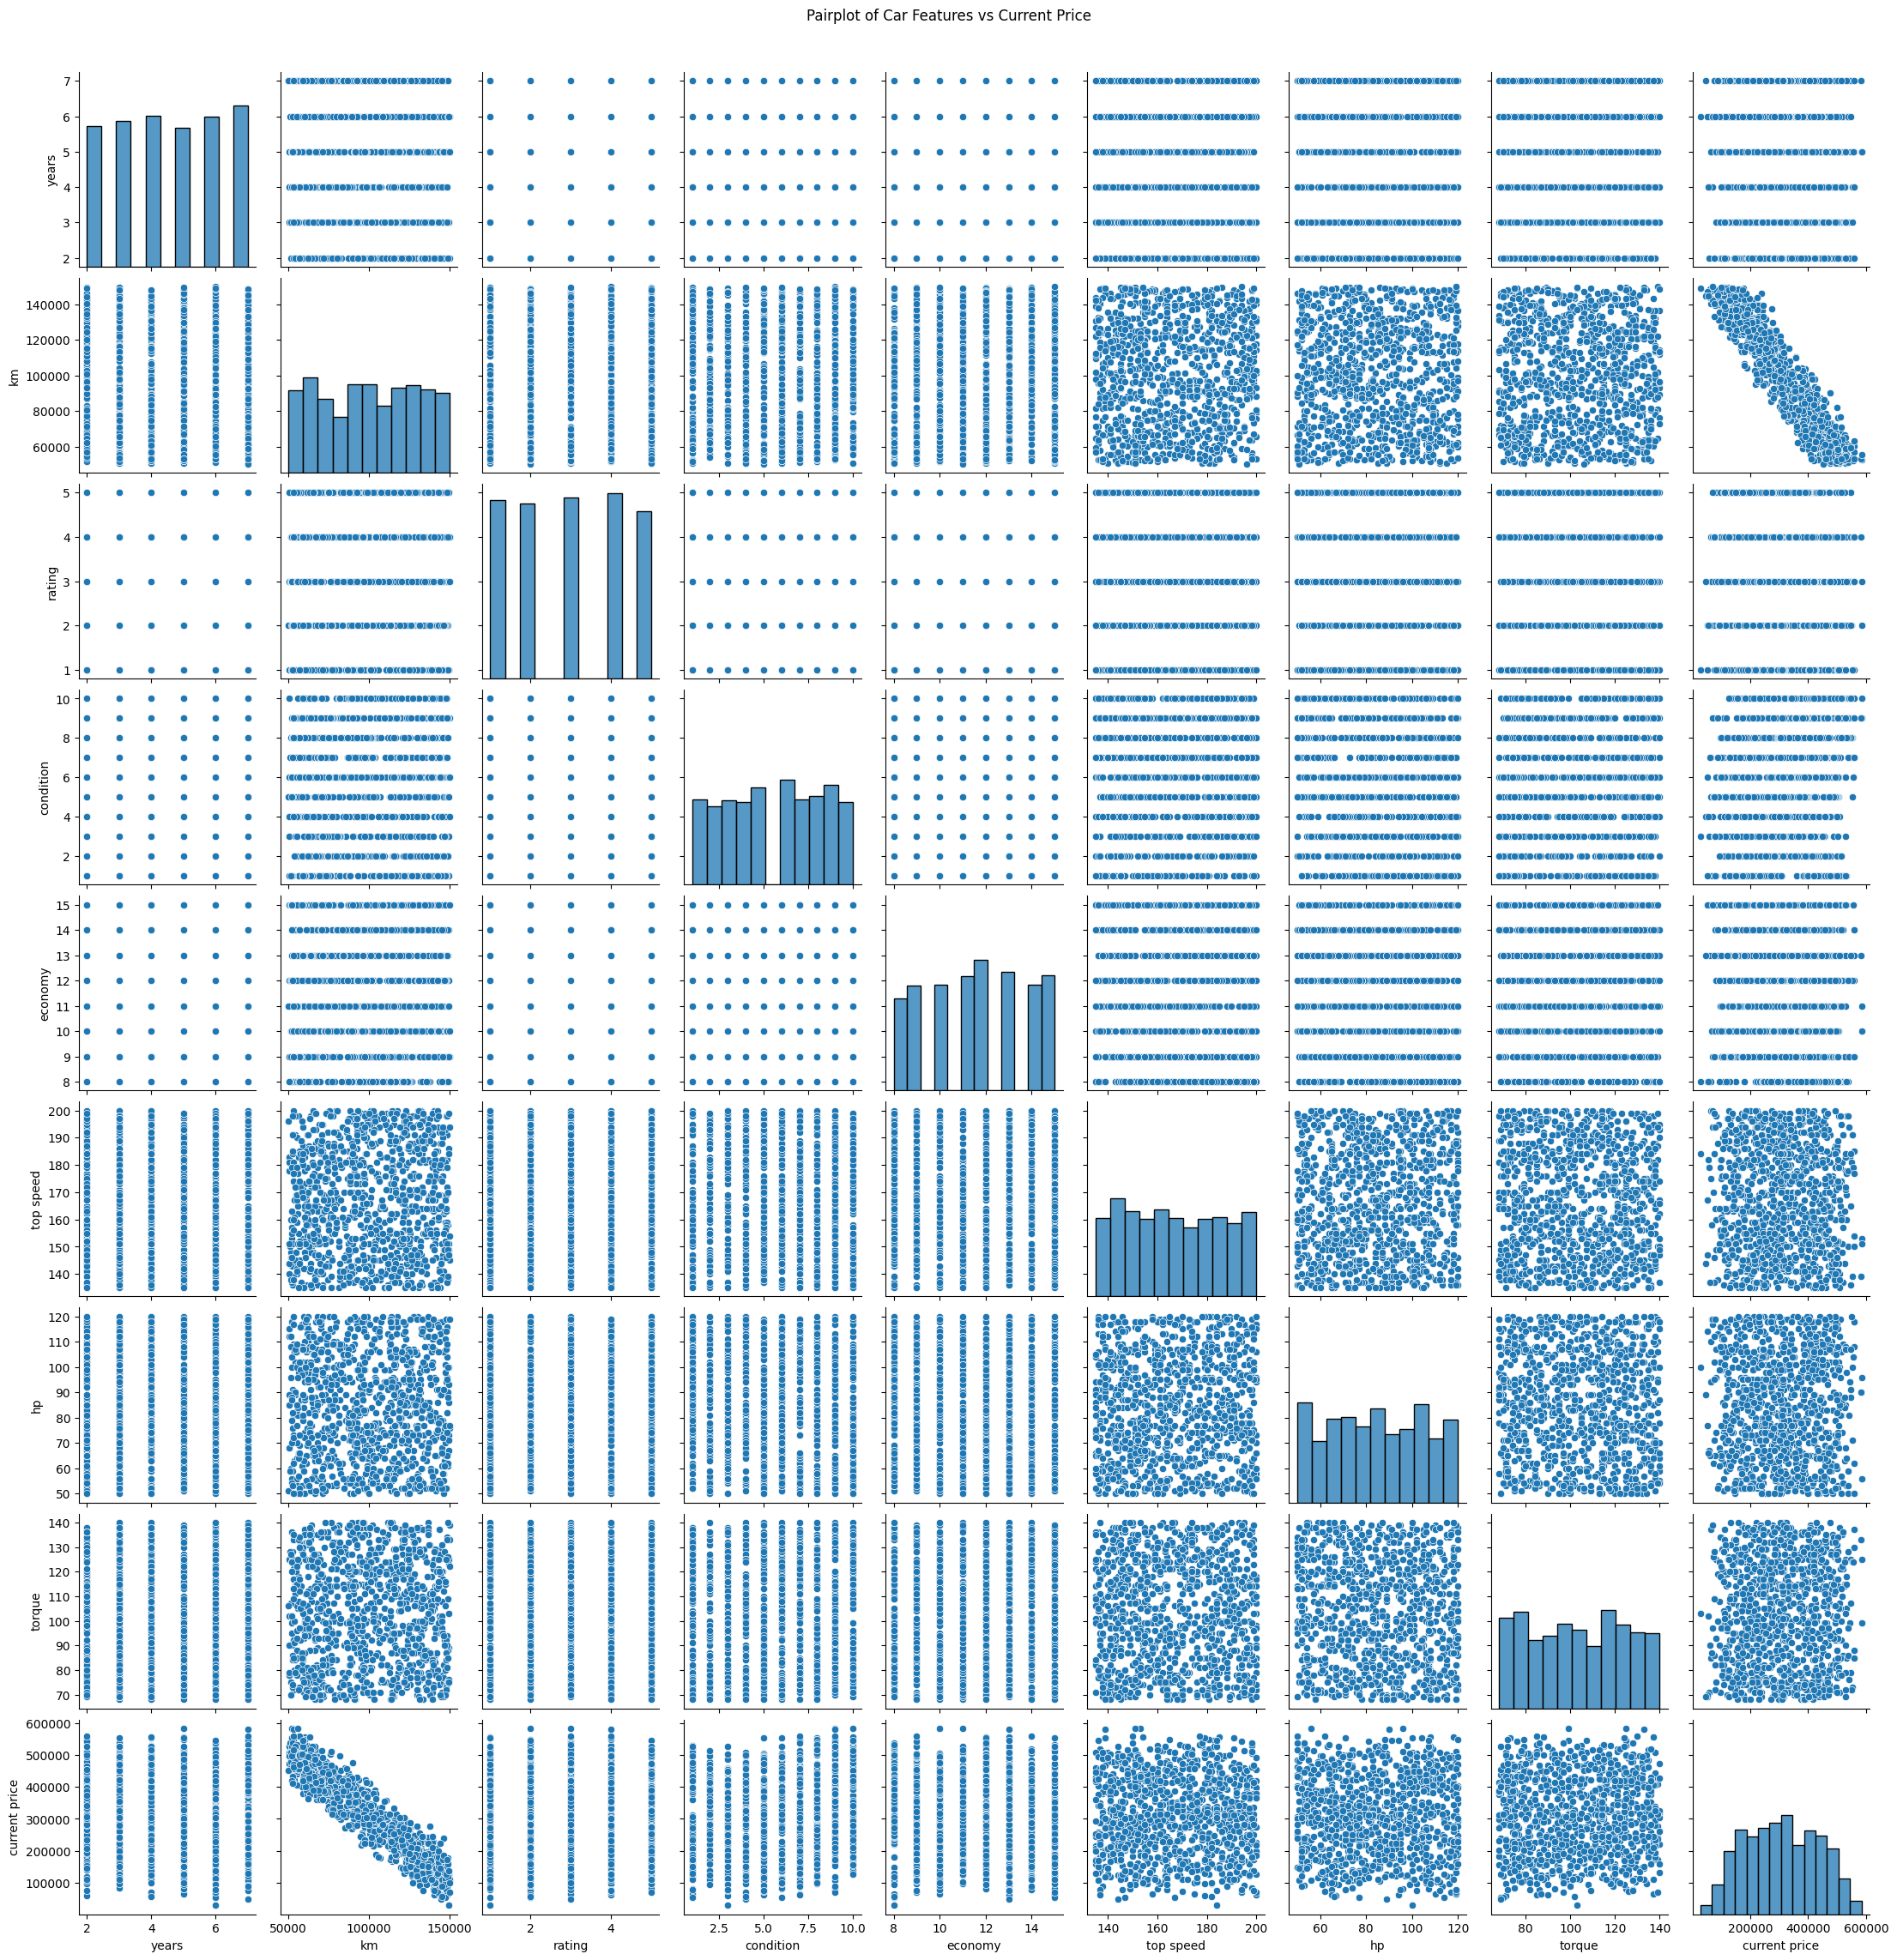

In [50]:
# Task 1.2: Create pairplot visualization
# TODO: Create pairplot for the specified columns

columns_to_plot = ['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']
plt.figure(figsize=(15,12))
sns.pairplot(df[columns_to_plot])
plt.suptitle('Pairplot of Car Features vs Current Price', y=1.02)
plt.show()
# Your code here


**Question 1.3:** What patterns do you observe? Which features seem most correlated with price?  
**Answer:** _______________

## Exercise 2: Data Preprocessing

In [51]:
# Task 2.1: Data shuffling and feature selection
# TODO: Shuffle the data and separate features (X) and target (y)

shuffled_data = tf.random.shuffle(df)
X = shuffled_data[:, 3:-1]
y = tf.expand_dims(shuffled_data[:, -1], -1)


In [52]:
# Task 2.1: Print shapes to verify

print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")

Features Shape: (1000, 8)
Target Shape: (1000, 1)


In [53]:
# Task 2.2: Define split ratios
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]

print(f"Trained set of X: {X_train.shape}, y: {y_train.shape}")

Trained set of X: (800, 8), y: (800, 1)


In [54]:
# Task 2.2: Validation split

X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]

print(f"Validation set of X: {X_val.shape}, y: {y_val.shape}")

Validation set of X: (100, 8), y: (100, 1)


In [55]:
# Task 2.2: Test split

X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]

print(f"Validation set of X: {X_test.shape}, y: {y_test.shape}")


Validation set of X: (100, 8), y: (100, 1)


In [56]:
# Verify all split shapes
print(f"Trained set of X: {X_train.shape}, y: {y_train.shape}")
print(f"Validation set of X: {X_val.shape}, y: {y_val.shape}")
print(f"Validation set of X: {X_test.shape}, y: {y_test.shape}")


Trained set of X: (800, 8), y: (800, 1)
Validation set of X: (100, 8), y: (100, 1)
Validation set of X: (100, 8), y: (100, 1)


## Exercise 3: Dataset Creation and Preprocessing

In [57]:
# Task 3.1: Set buffer and batch sizes
BUFFER_SIZE = 16
BATCH_SIZE = 32  # Different from original

# TODO: Create TensorFlow datasets for train, validation, and test
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [58]:
# Task 3.1: Verify batch shapes

for batch_X, batch_y in train_dataset:
    print(f"Training batch - X shape: {batch_X.shape}, y shape: {batch_y.shape}")
    break

for batch_X, batch_y in val_dataset:
    print(f"Validation batch - X shape: {batch_X.shape}, y shape: {batch_y.shape}")
    break
    
for batch_X, batch_y in test_dataset:
    print(f"Test batch - X shape: {batch_X.shape}, y shape: {batch_y.shape}")
    break


Training batch - X shape: (32, 8), y shape: (32, 1)
Validation batch - X shape: (32, 8), y shape: (32, 1)
Test batch - X shape: (32, 8), y shape: (32, 1)


In [59]:
# Task 3.2: Create and adapt normalization layer
# TODO: Create normalizer and adapt to training data

normalizer = Normalization()
normalizer.adapt(X_train)



In [60]:
# Task 3.2: Show first 5 normalized samples

normalized_sample = normalizer(X_train[:5])
print("The 5 original samples are: ")
print(X_train[:5].numpy())
print("\nFirst 5 Normalized training samples are: ")
print(normalized_sample.numpy())


The 5 original samples are: 
[[2.00000e+00 6.16120e+04 1.00000e+00 5.00000e+00 9.00000e+00 1.52000e+02
  5.40000e+01 1.01000e+02]
 [3.00000e+00 5.54650e+04 2.00000e+00 3.00000e+00 1.20000e+01 1.41000e+02
  1.00000e+02 9.30000e+01]
 [2.00000e+00 6.57060e+04 4.00000e+00 1.00000e+01 8.00000e+00 1.48000e+02
  8.40000e+01 7.50000e+01]
 [2.00000e+00 1.14705e+05 5.00000e+00 2.00000e+00 1.00000e+01 1.76000e+02
  9.60000e+01 6.90000e+01]
 [7.00000e+00 1.01621e+05 5.00000e+00 8.00000e+00 1.20000e+01 1.40000e+02
  5.70000e+01 7.10000e+01]]

First 5 Normalized training samples are: 
[[-1.5317328  -1.3433591  -1.390547   -0.19466746 -1.1922814  -0.8049923
  -1.4536921  -0.12210647]
 [-0.9445808  -1.5562339  -0.67377025 -0.9025489   0.15938397 -1.376923
   0.78725445 -0.49530673]
 [-1.5317328  -1.2015811   0.7597834   1.5750362  -1.6428365  -1.0129671
   0.00779478 -1.3350073 ]
 [-1.5317328   0.4952874   1.4765601  -1.2564896  -0.7417262   0.4428564
   0.5923895  -1.6149075 ]
 [ 1.4040275   0.042179

**Question 3.1:** Why is normalization important for neural networks?  
**Answer:** _______________

## Exercise 4: Model Architecture Design

In [61]:
# Task 4.1: Build your neural network model
# TODO: Create sequential model with specified architecture

model = tf.keras.Sequential([
    InputLayer(shape=(8,)),
    normalizer,
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1),
], name="car_price_predictor")


In [62]:
# Task 4.2: Display model summary
model.summary()


Model: "car_price_predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,978 (35.07 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 17 (72.00 B)

In [63]:
# Task 4.2: Create model visualization
# TODO: Plot and save model architecture

tf.keras.utils.plot_model(
    model,
    to_file="./output/car_predict.png",
    show_shapes = True,
    show_layer_names=True,
    randkir="TB"
)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


**Question 4.1:** How many total parameters does your model have?  
**Answer:** _______________

## Exercise 5: Model Compilation and Training

In [64]:
# Task 5.1: Compile the model
# TODO: Use Adam optimizer (lr=0.01), MSE loss, RMSE metric

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=MeanSquaredError(),
    metrics=[RootMeanSquaredError()]
)


**Question 5.1:** Why did you choose MSE over MAE for this problem?  
**Answer:** _______________

In [65]:
# Task 5.2: Train the model
# TODO: Train for 50 epochs with train and validation data

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    verbose=1
)



Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 110212907008.0000 - root_mean_squared_error: 331983.2812 - val_loss: 108230320128.0000 - val_root_mean_squared_error: 328983.7812
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102320406528.0000 - root_mean_squared_error: 319875.6250 - val_loss: 85065490432.0000 - val_root_mean_squared_error: 291659.8750
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47242338304.0000 - root_mean_squared_error: 217353.0312 - val_loss: 4964550144.0000 - val_root_mean_squared_error: 70459.5625
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4383484416.0000 - root_mean_squared_error: 66207.8906 - val_loss: 2413501440.0000 - val_root_mean_squared_error: 49127.3984
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2604062720.0000 - root_mean_squared_error: 51030.0195 - val_loss: 2173352192.0000 - val_root_mean_squared_error: 46619.2266
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2348932864.0000 - 

## Exercise 6: Model Evaluation and Analysis

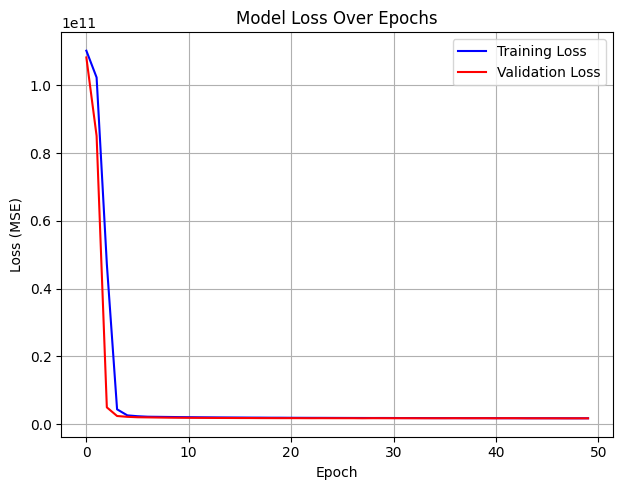

In [68]:
# Task 6.1: Plot training history - Loss
# TODO: Create loss plot with proper labels and legend

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss", color='blue')
plt.plot(history.history['val_loss'], label="Validation Loss", color='red')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


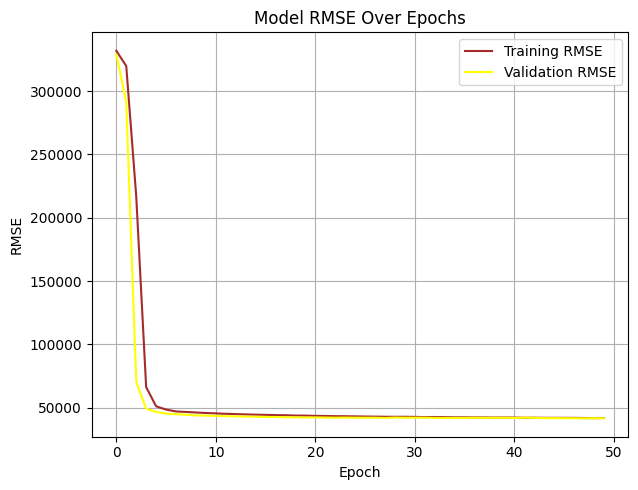

In [69]:
# Task 6.1: Plot training history - RMSE
# TODO: Create RMSE plot with proper labels and legend


plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['root_mean_squared_error'], label="Training RMSE", color='brown')
plt.plot(history.history['val_root_mean_squared_error'], label="Validation RMSE", color='yellow')
plt.title("Model RMSE Over Epochs")
plt.xlabel("Epoch")
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Question 6.1:** Is your model overfitting or underfitting? Explain your reasoning.  
**Answer:** _______________

In [70]:
# Task 6.2: Evaluate model on test data

test_result = model.evaluate(test_dataset, verbose=0)
#print(f"Test loss (MSE): {test_result[0]:.4f}")
#print(f"Test (RMSE): {test_result[1]:.4f}")

print('================================')

# Comparing the final metrics

final_train_loss = history.history['loss'][-1]
final_val_los = history.history['val_loss'][-1]
final_train_rmse = history.history['root_mean_squared_error'][-1]
final_val_rmse = history.history['val_root_mean_squared_error'][-1]

print('\nComparison')
print(f"Final Training Loss: {final_train_loss:.4}")
print(f"Final val Loss: {final_val_los:.4}")
print(f"Test Loss: {test_result[0]:.4f}")
print(f"Final Training RMSE: {final_train_rmse:.4}")
print(f"Final Validation RMSE: {final_val_rmse:.4}")
print(f"Test (RMSE): {test_result[1]:.4f}")


Comparison
Final Training Loss: 1.747e+09
Final val Loss: 1.729e+09
Test Loss: 1935512704.0000
Final Training RMSE: 4.18e+04
Final Validation RMSE: 4.158e+04
Test (RMSE): 43994.4609


**Question 6.2:** How do your test metrics compare to training metrics?  
**Answer:** _______________

## Exercise 7: Predictions and Results Visualization

In [71]:
# Task 7.1: Generate predictions
# TODO: Make predictions and extract actual vs predicted values

y_pred = model.predict(X_test)
y_true = y_test.numpy()

y_pred_flat = y_pred.flatten()
y_true_flat = y_true.flatten()

print(f"Predictions Shape: {y_pred.shape}")
print(f"Actual Values Shape: {y_true.shape}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predictions Shape: (100, 1)
Actual Values Shape: (100, 1)


In [72]:
# Task 7.1: Show first 10 actual vs predicted values

for i in range(10):
    actual = y_true_flat[i]
    predicted = y_pred_flat[i]
    diff = abs(actual-predicted)
    print(f"{actual:.2f}\t\t{predicted:.2f}\t\t{diff:.2f}")


285001.50		255081.44		29920.06
296565.50		273057.72		23507.78
360410.00		331903.56		28506.44
528634.00		534731.81		6097.81
145880.50		140365.41		5515.09
451140.50		514804.03		63663.53
327075.50		391503.91		64428.41
341076.00		381512.91		40436.91
284462.50		263861.28		20601.22
494345.50		488984.25		5361.25


In [73]:
# Task 7.1: Calculate mean absolute error manually

mae_manual = np.mean(np.abs(y_true_flat-y_pred_flat))
print(f'Manual Mean Absolute Error: {mae_manual:.4f}')

print('=========================')

mse_manual = np.mean((y_true_flat-y_pred_flat)**2)
rmse_manual = np.sqrt(mse_manual)

print(f"Manual Mean Squared Error: {mse_manual:.4f}")
print(f"Manual Root Mean Squared Error: {rmse_manual:.4f}")


Manual Mean Absolute Error: 35842.1212
Manual Mean Squared Error: 1935512736.0955
Manual Root Mean Squared Error: 43994.4626


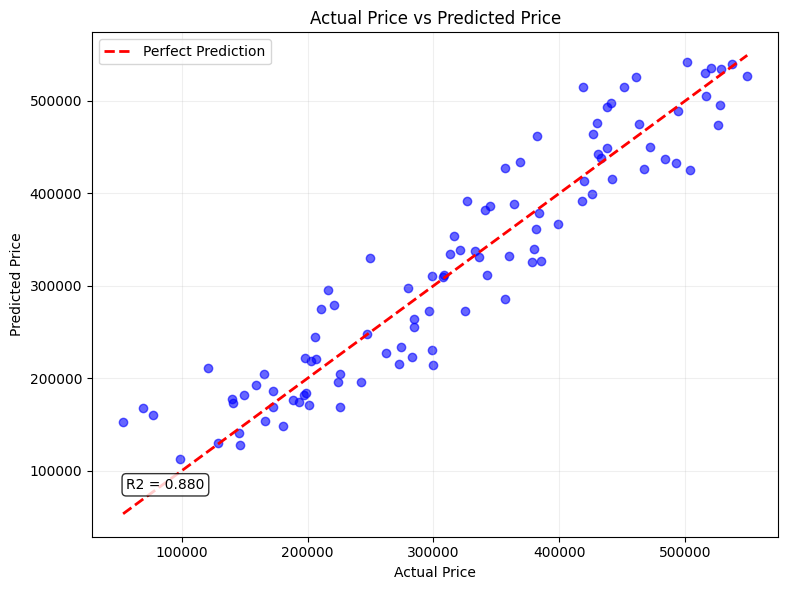

In [74]:
# Task 7.2: Create scatter plot (actual vs predicted)
# TODO: Include diagonal line for perfect prediction

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.scatter(y_true_flat, y_pred_flat, alpha=0.6, color='blue')
min_val = min(y_true_flat.min(), y_pred_flat.min())
max_val = max(y_true_flat.max(), y_pred_flat.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.grid(True, alpha=0.2)

r2_score = 1 - (np.sum((y_true_flat-y_pred_flat)**2)/np.sum((y_true_flat - np.mean(y_true_flat))**2))
plt.text(0.05, 0.095, f'R2 = {r2_score:.3f}', transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

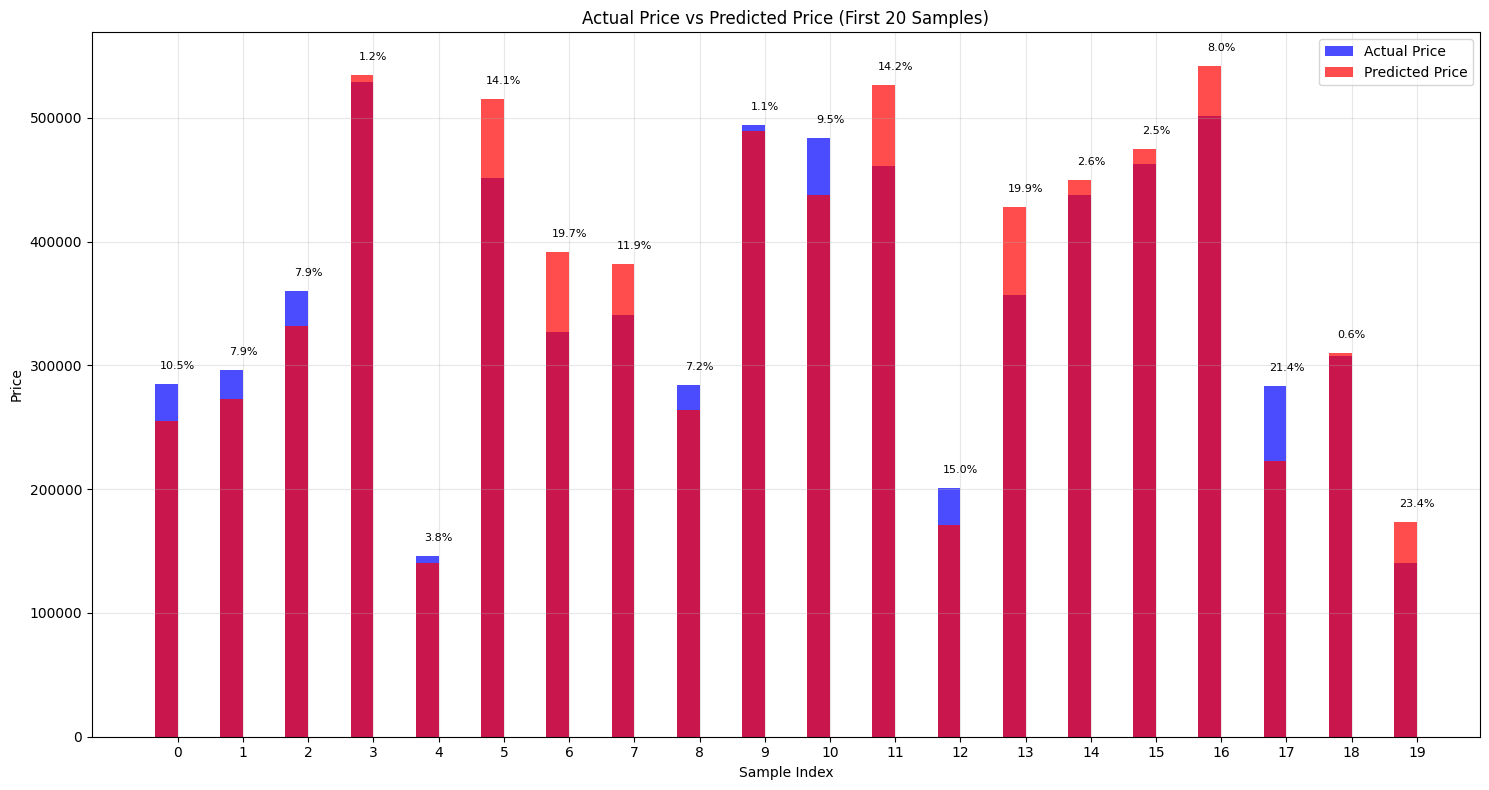

In [75]:
# Task 7.2: Create bar chart for first 20 predictions
# TODO: Side-by-side bars with different colors

plt.figure(figsize=(15,8))

indices = np.arange(20)
width = 0.35

plt.bar(indices - width/2, y_true_flat[:20], width, label='Actual Price', color='blue', alpha=0.7)
plt.bar(indices - width/2, y_pred_flat[:20], width, label='Predicted Price', color='red', alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel("Price")
plt.title('Actual Price vs Predicted Price (First 20 Samples)')
plt.legend()
plt.xticks(indices)
plt.grid(True, alpha=0.3)

for i in range(20):
    error_pct = abs(y_true_flat[i] - y_pred_flat[i])/y_true_flat[i]*100
    plt.text(i, max(y_true_flat[i], y_pred_flat[i]) + max(y_true_flat[:20])*0.02, f'{error_pct:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Exercise 8: Model Improvement (Bonus)

In [77]:
# Task 8.1: Experiment with different hyperparameters
# TODO: Try different configurations and compare results

results = []

# Experiment 1: Different Learning Rates

learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    test_model = tf.keras.Sequential([
        InputLayer(shape=(8,)),
        normalizer,
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1),
    ])
    test_model.compile(
        optimizer = Adam(learning_rate = lr),
        loss = MeanSquaredError(),
        metrics = [RootMeanSquaredError()]
    )

    test_history = test_model.fit(
        train_dataset,
        validation_data = val_dataset,
        epochs = 20,
        verbose =0
    )

    final_val_rmse = test_history.history['val_root_mean_squared_error'][-1]
    results.append({
        'config': f'LR= {lr}',
        'val_rmse': final_val_rmse,
    })
    print(f'Final Validation RMSE: {final_val_rmse:.4f}')

print('\n==============================================')

for result in results:
    print(f"{result['config']}: RMSE={result['val_rmse']:.4f}")




Testing learning rate: 0.001
Final Validation RMSE: 151040.3281

Testing learning rate: 0.01
Final Validation RMSE: 43582.7305

Testing learning rate: 0.1
Final Validation RMSE: 45963.6680

LR= 0.001: RMSE=151040.3281
LR= 0.01: RMSE=43582.7305
LR= 0.1: RMSE=45963.6680


In [78]:
# Task 8.2: Try advanced techniques
# TODO: Add dropout, different optimizers, early stopping, etc.

from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [82]:
advanced_model =  tf.keras.Sequential([
    InputLayer(shape=(8,)),
    normalizer,
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1),
], name= "advanced_car_predictor")

advanced_model.compile(
    optimizer = Adam(learning_rate = 0.01),
    loss = MeanSquaredError(),
    metrics = [RootMeanSquaredError()]
)

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True
)

print("Training advanced model with dropout and early stoping ................")

advanced_model = advanced_model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 100,
    callbacks = [early_stopping],
    verbose =1   
)

advanced_results = advanced_model.evaluate(test_dataset, verbose= 0)
print(f"\nAdvanced Model Test RMSE: {advanced_results[1]:.4f}")
print(f"Original Model Test RMSE: {test_results[1]:.4f}")
print(f"Improvement {((test_results[1] - advanced_results[1])/test_results[1]*100):.2f}%")

Training advanced model with dropout and early stoping ................
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 110347788288.0000 - root_mean_squared_error: 332186.3750 - val_loss: 108953985024.0000 - val_root_mean_squared_error: 330081.7812
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 107285422080.0000 - root_mean_squared_error: 327544.5312 - val_loss: 100042039296.0000 - val_root_mean_squared_error: 316294.2188
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81799520256.0000 - root_mean_squared_error: 286006.1562 - val_loss: 49469341696.0000 - val_root_mean_squared_error: 222417.0469
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20672002048.0000 - root_mean_squared_error: 143777.6094 - val_loss: 3673070080.0000 - val_root_mean_squared_error: 60605.8594
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7718944768.0000 - root_mean_squared_error: 87857.5234 - val_loss: 2543011840.0000 - val_root_mean_squared_error: 5042

AttributeError: 'History' object has no attribute 'evaluate'

## Exercise 9: Business Insights

**Question 9.1:** Which features do you think are most important for price prediction?  
**Answer:** _______________

**Question 9.2:** How could you test feature importance in this neural network?  
**Answer:** _______________

**Question 9.3:** What business insights can you derive from your model?  
**Answer:** _______________

**Question 9.4:** What are the limitations of your current model?  
**Answer:** _______________

**Question 9.5:** How could you improve the model performance?  
**Answer:** _______________

**Question 9.6:** What additional features might be helpful?  
**Answer:** _______________

**Question 9.7:** How would you deploy this model in a real-world application?  
**Answer:** _______________

## Summary and Reflection

**What did you learn from this exercise?**  
_______________

**What was the most challenging part?**  
_______________

**What would you do differently next time?**  
_______________

In [ ]:
# Final model summary and key metrics
print("=== FINAL MODEL SUMMARY ===")
print(f"Model Architecture: {model.name}")
print(f"Total Parameters: {model.count_params()}")
# Add your final performance metrics here
